# Prediction of the chronic kidney disease using Random forest classifier

## Import the libraries

In [62]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

## Load the dataset

In [63]:
data=pd.read_csv(r"D:\chronickidneydisease.csv")
data.head(10)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


## Drop the id column

In [64]:
data.drop(["id"],axis=1,inplace=True)

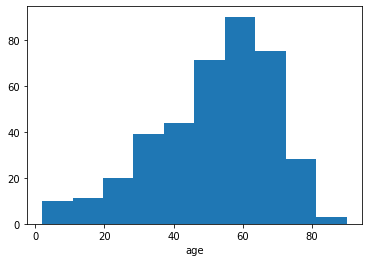

In [65]:
plt.hist(data['age']);
plt.xlabel('age');
plt.show();

<AxesSubplot:>

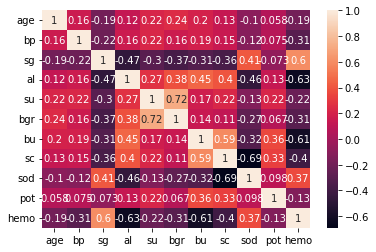

In [66]:
sns.heatmap(data.corr(),annot=True)

## Renaming the column names

In [67]:
data.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [68]:
data.columns=(['AGE','blood_pressure','specific_gravity','albumin','sugar','RED_BLOOD_CELL','PUS_CELL','pus_cell_clumps',
              'bacteria','BLOOD_GLUCOSE_RANDOM','BLOOD_UREA','serum_creatinine','sodium','potassium','hemoglobin','packed_cell_volume',
              'white_blood_cell_count','red_blood_cell_count','hypertension','DIABETES_MELLITUS','CORONARY_ARTERY_DISEASE',
              'APPETITE','PEDAL_EDEMA','ANEMIA','class'])

In [69]:
data.columns

Index(['AGE', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'RED_BLOOD_CELL', 'PUS_CELL', 'pus_cell_clumps', 'bacteria',
       'BLOOD_GLUCOSE_RANDOM', 'BLOOD_UREA', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'DIABETES_MELLITUS', 'CORONARY_ARTERY_DISEASE', 'APPETITE',
       'PEDAL_EDEMA', 'ANEMIA', 'class'],
      dtype='object')

## Cleaning and pre-processing the data

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AGE                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   RED_BLOOD_CELL           248 non-null    object 
 6   PUS_CELL                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   BLOOD_GLUCOSE_RANDOM     356 non-null    float64
 10  BLOOD_UREA               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [71]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [72]:
data['class']=data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [73]:
data['CORONARY_ARTERY_DISEASE']=data.CORONARY_ARTERY_DISEASE.replace('\tno','no')
c(data['CORONARY_ARTERY_DISEASE'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [74]:
data['DIABETES_MELLITUS']=data.DIABETES_MELLITUS.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})
c(data['DIABETES_MELLITUS'])

Counter({'yes': 137, 'no': 261, nan: 2})

In [75]:
data['APPETITE'].unique()

array(['good', 'poor', nan], dtype=object)

## Understanding the data type and summary of features

In [76]:
contcols=set(data.dtypes[data.dtypes!='0'].index.values)
print(contcols)

{'AGE', 'bacteria', 'PEDAL_EDEMA', 'blood_pressure', 'albumin', 'potassium', 'PUS_CELL', 'RED_BLOOD_CELL', 'white_blood_cell_count', 'specific_gravity', 'DIABETES_MELLITUS', 'pus_cell_clumps', 'CORONARY_ARTERY_DISEASE', 'class', 'sugar', 'ANEMIA', 'serum_creatinine', 'BLOOD_GLUCOSE_RANDOM', 'sodium', 'BLOOD_UREA', 'hemoglobin', 'red_blood_cell_count', 'APPETITE', 'hypertension', 'packed_cell_volume'}


In [77]:
contcols.remove('class')
contcols.remove('ANEMIA')
contcols.remove('pus_cell_clumps')
contcols.remove('PUS_CELL')
contcols.remove('DIABETES_MELLITUS')
contcols.remove('PEDAL_EDEMA')
contcols.remove('sugar')
contcols.remove('hypertension')
contcols.remove('bacteria')
contcols.remove('specific_gravity')
contcols.remove('CORONARY_ARTERY_DISEASE')
contcols.remove('APPETITE')
contcols.remove('albumin')
contcols.remove('RED_BLOOD_CELL')
print(contcols)

{'AGE', 'blood_pressure', 'potassium', 'white_blood_cell_count', 'serum_creatinine', 'BLOOD_GLUCOSE_RANDOM', 'sodium', 'BLOOD_UREA', 'hemoglobin', 'red_blood_cell_count', 'packed_cell_volume'}


In [78]:
catcols=set(data.dtypes[data.dtypes=='0'].index.values)
print(catcols)

set()


In [79]:
catcols.add('class')
catcols.add('ANEMIA')
catcols.add('pus_cell_clumps')
catcols.add('PUS_CELL')
catcols.add('DIABETES_MELLITUS')
catcols.add('PEDAL_EDEMA')
catcols.add('sugar')
catcols.add('hypertension')
catcols.add('bacteria')
catcols.add('specific_gravity')
catcols.add('CORONARY_ARTERY_DISEASE')
catcols.add('APPETITE')
catcols.add('albumin')
catcols.add('RED_BLOOD_CELL')
print(catcols)

{'DIABETES_MELLITUS', 'pus_cell_clumps', 'albumin', 'PUS_CELL', 'bacteria', 'CORONARY_ARTERY_DISEASE', 'class', 'PEDAL_EDEMA', 'ANEMIA', 'sugar', 'APPETITE', 'RED_BLOOD_CELL', 'hypertension', 'specific_gravity'}


## Identifying the columns that has null values

In [80]:
data.isnull().any()

AGE                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
RED_BLOOD_CELL              True
PUS_CELL                    True
pus_cell_clumps             True
bacteria                    True
BLOOD_GLUCOSE_RANDOM        True
BLOOD_UREA                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
DIABETES_MELLITUS           True
CORONARY_ARTERY_DISEASE     True
APPETITE                    True
PEDAL_EDEMA                 True
ANEMIA                      True
class                      False
dtype: bool

In [81]:
data.isnull().sum() #count of null values in the columns

AGE                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
RED_BLOOD_CELL             152
PUS_CELL                    65
pus_cell_clumps              4
bacteria                     4
BLOOD_GLUCOSE_RANDOM        44
BLOOD_UREA                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
DIABETES_MELLITUS            2
CORONARY_ARTERY_DISEASE      2
APPETITE                     1
PEDAL_EDEMA                  1
ANEMIA                       1
class                        0
dtype: int64

In [82]:
data.packed_cell_volume=pd.to_numeric(data.packed_cell_volume, errors='coerce')
data.white_blood_cell_count=pd.to_numeric(data.white_blood_cell_count, errors='coerce')
data.red_blood_cell_count=pd.to_numeric(data.red_blood_cell_count, errors='coerce')

## Replacing the null values using fillna method

In [83]:
data['BLOOD_GLUCOSE_RANDOM'].fillna(data['BLOOD_GLUCOSE_RANDOM'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(),inplace=True)
data['BLOOD_UREA'].fillna(data['BLOOD_UREA'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [84]:
data['AGE'].fillna(data['AGE'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['APPETITE'].fillna(data['APPETITE'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['PUS_CELL'].fillna(data['PUS_CELL'].mode()[0],inplace=True)
data['RED_BLOOD_CELL'].fillna(data['RED_BLOOD_CELL'].mode()[0],inplace=True)
data['CORONARY_ARTERY_DISEASE'].fillna(data['CORONARY_ARTERY_DISEASE'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['ANEMIA'].fillna(data['ANEMIA'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['DIABETES_MELLITUS'].fillna(data['DIABETES_MELLITUS'].mode()[0],inplace=True)
data['PEDAL_EDEMA'].fillna(data['PEDAL_EDEMA'].mode()[0],inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0],inplace=True)

## Checking for the null values present or not

In [85]:
data.isnull().sum()

AGE                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
RED_BLOOD_CELL             0
PUS_CELL                   0
pus_cell_clumps            0
bacteria                   0
BLOOD_GLUCOSE_RANDOM       0
BLOOD_UREA                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
DIABETES_MELLITUS          0
CORONARY_ARTERY_DISEASE    0
APPETITE                   0
PEDAL_EDEMA                0
ANEMIA                     0
class                      0
dtype: int64

In [86]:
data

,AGE,blood_pressure,specific_gravity,albumin,sugar,RED_BLOOD_CELL,PUS_CELL,pus_cell_clumps,bacteria,BLOOD_GLUCOSE_RANDOM,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,DIABETES_MELLITUS,CORONARY_ARTERY_DISEASE,APPETITE,PEDAL_EDEMA,ANEMIA,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


## Label encoding

In [87]:
le=LabelEncoder() #changing the values to numerical
data.PUS_CELL= le.fit_transform(data.PUS_CELL)
data.ANEMIA = le.fit_transform(data.ANEMIA)
data.CORONARY_ARTERY_DISEASE = le.fit_transform(data.CORONARY_ARTERY_DISEASE)
data.DIABETES_MELLITUS = le.fit_transform(data.DIABETES_MELLITUS)
data.RED_BLOOD_CELL = le.fit_transform(data.RED_BLOOD_CELL)
data.PEDAL_EDEMA = le.fit_transform(data.PEDAL_EDEMA)
data.APPETITE = le.fit_transform(data.APPETITE)
data.sugar= le.fit_transform(data.sugar)

In [88]:
data

,AGE,blood_pressure,specific_gravity,albumin,sugar,RED_BLOOD_CELL,PUS_CELL,pus_cell_clumps,bacteria,BLOOD_GLUCOSE_RANDOM,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,DIABETES_MELLITUS,CORONARY_ARTERY_DISEASE,APPETITE,PEDAL_EDEMA,ANEMIA,class
0,48.0,80.0,1.020,1.0,0,1,1,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,1,0,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0,1,1,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,0,0,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3,1,1,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,1,0,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0,1,0,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,0,0,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0,1,1,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,0,0,0,0,0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0,1,1,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,0,0,0,0,0,notckd
396,42.0,70.0,1.025,0.0,0,1,1,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,0,0,0,0,0,notckd
397,12.0,80.0,1.020,0.0,0,1,1,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,0,0,0,0,0,notckd
398,17.0,60.0,1.025,0.0,0,1,1,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,0,0,0,0,0,notckd


## Selecting the required columns for the project

In [89]:
selcols=['AGE','BLOOD_UREA','BLOOD_GLUCOSE_RANDOM','APPETITE','ANEMIA','CORONARY_ARTERY_DISEASE','PUS_CELL',
         'RED_BLOOD_CELL','DIABETES_MELLITUS','PEDAL_EDEMA']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data,columns=['class'])
print(x.shape)
print(y.shape)

(400, 10)
(400, 1)


## Splitting the data for training and testing

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 10)
(320, 1)
(80, 10)
(80, 1)


In [91]:
x_train

,AGE,BLOOD_UREA,BLOOD_GLUCOSE_RANDOM,APPETITE,ANEMIA,CORONARY_ARTERY_DISEASE,PUS_CELL,RED_BLOOD_CELL,DIABETES_MELLITUS,PEDAL_EDEMA
205,61.0,28.0,100.000000,0,0,0,1,1,1,0
354,32.0,17.0,102.000000,0,0,0,1,1,0,0
3,48.0,56.0,117.000000,1,1,0,0,1,0,1
264,42.0,24.0,132.000000,0,0,0,1,1,0,0
194,80.0,49.0,148.036517,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
299,73.0,48.0,127.000000,0,0,0,1,1,0,0
22,48.0,163.0,95.000000,0,1,0,0,1,0,0
72,64.0,35.0,148.036517,0,0,0,0,1,1,1
15,40.0,162.0,76.000000,0,1,0,1,1,0,0


In [92]:
y_train

,class
205,ckd
354,notckd
3,ckd
264,notckd
194,ckd
...,...
299,notckd
22,ckd
72,ckd
15,ckd


In [93]:
x_test

,AGE,BLOOD_UREA,BLOOD_GLUCOSE_RANDOM,APPETITE,ANEMIA,CORONARY_ARTERY_DISEASE,PUS_CELL,RED_BLOOD_CELL,DIABETES_MELLITUS,PEDAL_EDEMA
94,65.0,66.0,93.000000,0,0,0,1,1,1,0
32,61.0,39.0,159.000000,1,0,0,1,1,1,0
225,60.0,95.0,490.000000,0,0,0,1,0,1,0
157,62.0,42.0,122.000000,0,0,0,0,1,1,0
356,34.0,38.0,87.000000,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
188,8.0,66.0,80.000000,0,0,0,1,1,0,0
223,71.0,30.0,303.000000,0,0,0,1,1,1,0
65,44.0,20.0,148.036517,0,0,0,1,1,0,0
262,55.0,18.0,118.000000,0,0,0,1,1,0,0


In [94]:
y_test

,class
94,ckd
32,ckd
225,ckd
157,ckd
356,notckd
...,...
188,ckd
223,ckd
65,ckd
262,notckd


## Using random forest classifier for prediction

In [95]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [96]:
model.fit(x_train,y_train)

C:\Users\HP\AppData\Local\Temp\ipykernel_12384\1002171229.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


RandomForestClassifier()

In [97]:
y_pred=model.predict(x_test)
print(y_pred)

['ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd'
 'ckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'notckd' 'ckd' 'notckd' 'ckd' 'ckd' 'notckd'
 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd'
 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'notckd' 'notckd'
 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'notckd' 'notckd'
 'ckd' 'ckd' 'notckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd' 'ckd'
 'notckd' 'notckd' 'ckd' 'ckd' 'notckd' 'ckd' 'ckd' 'ckd' 'ckd' 'notckd'
 'ckd']


## Test the model

In [98]:
y_pred1=model.predict([[12,123,123,0,0,0,0,0,0,0]])
print(y_pred1)

['ckd']


C:\Users\HP\anaconda3\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [99]:
accuracy_score(y_test,y_pred)

0.9625

In [100]:
model.score(x_train,y_train)

1.0

## Model Evaluation

In [102]:
print(confusion_matrix(y_test,y_pred))

[[52  2]
 [ 1 25]]


True positive = 52 
True negative = 2 
False positive = 1 
False negative = 25 

## Saving the model using pickle

In [103]:
pickle.dump(model,open('CKD.pkl','wb'))